<a href="https://colab.research.google.com/github/VincentGaoHJ/Course-CS5242/blob/master/practice_3_multilayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practice 3: Multilayer Networks


In [30]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Pytorch has a wide variety of datasets that one can leverage. In this tutorial, we will
use one such dataset and build a multilayer neural network to fit the data. We will 
use PyTorch optimizers to perform the optimization process.**


Q1. Use the following snippet to get a dataloader from the already available Mnist dataset from 
PyTorch. Mnist dataset has 60,000 digit images with its corresponding labels.
This snippet will download the dataset if not downloaded already and transform each 
image before returning it. Dataloaders are iterable over a dataset. For further reading follow [pytorch dataloader](https://pytorch.org/docs/stable/data.html)

```python
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
traintloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
```

In [8]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
traintloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Code for the test dataset and data loader
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Use the help command to see the dictionary elements, attributes and method of any object
help(traintloader)

Help on DataLoader in module torch.utils.data.dataloader object:

class DataLoader(typing.Generic)
 |  Data loader. Combines a dataset and a sampler, and provides an iterable over
 |  the given dataset.
 |  
 |  The :class:`~torch.utils.data.DataLoader` supports both map-style and
 |  iterable-style datasets with single- or multi-process loading, customizing
 |  loading order and optional automatic batching (collation) and memory pinning.
 |  
 |  See :py:mod:`torch.utils.data` documentation page for more details.
 |  
 |  Arguments:
 |      dataset (Dataset): dataset from which to load the data.
 |      batch_size (int, optional): how many samples per batch to load
 |          (default: ``1``).
 |      shuffle (bool, optional): set to ``True`` to have the data reshuffled
 |          at every epoch (default: ``False``).
 |      sampler (Sampler or Iterable, optional): defines the strategy to draw
 |          samples from the dataset. Can be any ``Iterable`` with ``__len__``
 |         

Q2. Wrap the dataloader with python “iter” class which will give you an iterable object from which you can get new images and labels using .next(). After applying iter, iterate through a few samples, check the shape, the datatype of the image, label tuple that you are getting. Plot some of the images. Also, print the flattened shape of each image. (hint: use .flatten())


In [14]:
print('Dataset: ', traintloader.dataset)
print('samples per batch: ', traintloader.batch_size)

Dataset:  Dataset MNIST
    Number of datapoints: 60000
    Root location: /root/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
samples per batch:  64


In [20]:
# Here we are doing some initial analysis of what .next of dataloader returns
train_iter = iter(traintloader)
batches, labels = train_iter.next()

# check the shape
print('Tensor shape: ', batches.shape)
# the datatype of the image
print('Datatype of image: ', batches.type)
# label tuple that you are getting
print('Label tuple: ', labels)
# Also, print the flattened shape of each image. (hint: use .flatten())
print('Flattened shape of each image: ', batches[0].flatten().shape)

Tensor shape:  torch.Size([64, 1, 28, 28])
Datatype of image:  <built-in method type of Tensor object at 0x7f3df881a990>
Label tuple:  tensor([5, 9, 4, 9, 9, 7, 7, 3, 0, 5, 8, 8, 2, 1, 0, 9, 7, 6, 5, 8, 6, 9, 4, 2,
        9, 7, 2, 1, 7, 6, 0, 7, 2, 9, 8, 6, 1, 0, 8, 9, 6, 1, 3, 7, 1, 4, 7, 0,
        9, 9, 1, 9, 4, 2, 4, 8, 7, 5, 2, 7, 0, 0, 2, 3])
Flattened shape of each image:  torch.Size([784])


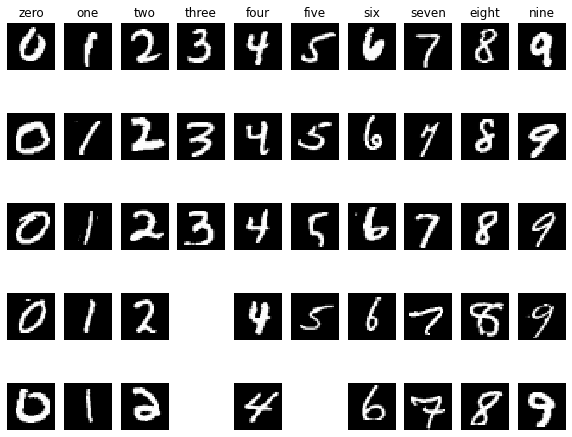

In [31]:
np.random.seed(0)     # We need to set the seed to help in reproducibility of data

length_of_dict_class = 10 # This indicates we have 10 labels corresponding to Mnist dataset
dict_class = {0:"zero", 1:"one", 2: "two", 3: "three", 4:"four", 5:"five", 6:"six", 7:"seven", 8:"eight", 9:"nine"}

# Since we notice the dimension of image is 1 * 28 * 28, this means image is gray scale, 
# it has only one channel, we should squeeze the extra dimension


def visualize_images(examples_per_class):
    
    for cls in range(length_of_dict_class):
        idxs = np.where((labels == cls))[0] # Find index of the specific class
        # If in this batch we do not get the required number of samples we want to show, skip
        if len(idxs) >= examples_per_class:
            idxs = np.random.choice(idxs, examples_per_class, replace=False) 
        
        # Plot here
        for enu_idx, img_idx in enumerate(idxs):
            plt_index = enu_idx * length_of_dict_class + cls + 1
            plt.subplot(examples_per_class, length_of_dict_class, plt_index)
            plt.imshow(torch.squeeze(batches[img_idx]))
            plt.axis('off')
            if enu_idx == 0:
                plt.title(dict_class[cls])
    
visualize_images(5)


Q3. Build a multilayer neural network with 3 fully connected layers of shape (784, 128), (128, 64) and then (64, 10). Use ReLu activation in between each layer, and at the end of the output layer. 
The class should have a forward function that you will manually create. The forward will take image batch as an input (image_batch * flattened_image_784_size) and return (image_batch x 10) size vectors.

**Hint**: Use torch.nn.Linear for linear layers. Follow this pytorch module to understand how to inherit the [pytorch module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module) class.


In [33]:
# Declare device which you will be working with
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

In [36]:
class Model(nn.Module):
    """
    Multilayer neural network with 3 fully connected layers of shape 
    (784, 128) -> (128, 64) -> (64, 10)
    """

    # Use ReLu activation in between each layer, and at the end of the output layer. 
    # The class should have a forward function that you will manually create. 
    # The forward will take image batch as an input (image_batch * flattened_image_784_size) and return (image_batch x 10) size vectors.
    def __init__(self):
        # Creates an instance of the base nn.Module class
        super(Model, self).__init__() # Inheritance of the base class nn.Module
        # Fully connected layers
        self.fc1 = nn.Linear(784, 128) # 28 x 28 input pixels connecting to the first hidden layer (128 node)
        self.fc2 = nn.Linear(128, 64) # 128 to 64 hidden layer
        self.fc3 = nn.Linear(64, 10) # last hidden layer to the output layer (with 10 nodes).

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

network = Model().to(device)
print(network)

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Q4. Create a cross-entropy loss. You can create it yourself (just like the last tutorial) or create it by using torch.nn.CrossEntropyLoss (pytorch cross-entropy loss uses logits, not softmax probabilities, so we had not applied softmax at the last layer). Initialize an SGD optimizer from torch.optim. 

**PyTorch Loss-Input Confusion (Cheatsheet)**

*   torch.nn.functional.binary_cross_entropy takes logistic sigmoid values as inputs
*   torch.nn.functional.binary_cross_entropy_with_logits takes logits as inputs
*   torch.nn.functional.cross_entropy takes logits as inputs (performs log_softmax internally)
*   torch.nn.functional.nll_loss is like cross_entropy but takes log-probabilities (log-softmax) values as inputs


In [40]:
# used 0.1 learning rate
learning_rate = 0.1
momentum = 0.9
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum) 
# create a loss function
criterion = nn.NLLLoss()


Q5. (1 pass of the data) Write a training loop which will 
1.	Get data batches from dataloader, feed it into the network and get outputs.
2.	Get loss using outputs and ground truth labels.
3.	Call backward on the loss (remember to clear grads before calling gradients)
4.	Call optimizer.step to perform SGD update.
5.	Print the accuracy, loss and amount of data used till now.


**Note**: We have used only training split in this week tutorial for sake of simplicity of the tutorial. 


In [ ]:
def cal_acc(probs, target):
    # probs: probability that each image is labeled as 1
    # target: ground truth label
    with torch.no_grad():
    # ...

    
    return acc

def train_one_pass(p_network, p_optim):
  # Input: Network and Optimizer
  # Output: Averge accuracy , Avergae loss in the pass
  p_network.train()
  acc_one_pass = []
  loss_one_pass = []
  
  # Fill out here
  # ...
    

    


    
  
  return avg_acc, avg_loss

avg_acc, avg_loss = train_one_pass(network, optimizer)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Iter: 0.00.  Train Total Loss: 2.28.  Train Accuracy: 21.88% 
Iter: 0.11.  Train Total Loss: 0.66.  Train Accuracy: 73.44% 
Iter: 0.21.  Train Total Loss: 0.52.  Train Accuracy: 85.94% 
Iter: 0.32.  Train Total Loss: 0.49.  Train Accuracy: 82.81% 
Iter: 0.43.  Train Total Loss: 0.27.  Train Accuracy: 89.06% 
Iter: 0.53.  Train Total Loss: 0.45.  Train Accuracy: 84.38% 
Iter: 0.64.  Train Total Loss: 0.55.  Train Accuracy: 82.81% 
Iter: 0.75.  Train Total Loss: 0.27.  Train Accuracy: 89.06% 
Iter: 0.85.  Train Total Loss: 0.28.  Train Accuracy: 92.19% 
Iter: 0.96.  Train Total Loss: 0.23.  Train Accuracy: 93.75% 



Q6. (Multiple Passes of Data) Write a loop to perform the training pass for 50 training iterations (50 epochs, this is outer for loop of data loader). Print and save accuracy and loss after each epoch.


In [ ]:
def test_one_pass(p_network):
  # Input: Network and Optimizer
  # Output: Averge accuracy , Avergae loss in the pass
  p_network.eval()
  acc_one_pass = []
  loss_one_pass = []
  
  # Fill out here
  # ...





  





  return avg_acc, avg_loss

Running the network with SGD optimizer with learning rate = 0.1
Iter: 0.00.  Train Total Loss: 0.09.  Train Accuracy: 96.88% 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Iter: 0.11.  Train Total Loss: 0.00.  Train Accuracy: 100.00% 
Iter: 0.21.  Train Total Loss: 0.05.  Train Accuracy: 98.44% 
Iter: 0.32.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.43.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.53.  Train Total Loss: 0.03.  Train Accuracy: 98.44% 
Iter: 0.64.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.75.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.85.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.96.  Train Total Loss: 0.05.  Train Accuracy: 98.44% 
 Epoch: 0.  Training Total Loss: 0.02.  Training Accuracy: 99.21%  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


 Epoch: 0.  Test Total Loss: 0.08.  Test Accuracy: 97.81%  
Iter: 0.00.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.11.  Train Total Loss: 0.04.  Train Accuracy: 98.44% 
Iter: 0.21.  Train Total Loss: 0.02.  Train Accuracy: 100.00% 
Iter: 0.32.  Train Total Loss: 0.09.  Train Accuracy: 98.44% 
Iter: 0.43.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.53.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.64.  Train Total Loss: 0.00.  Train Accuracy: 100.00% 
Iter: 0.75.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.85.  Train Total Loss: 0.01.  Train Accuracy: 100.00% 
Iter: 0.96.  Train Total Loss: 0.02.  Train Accuracy: 100.00% 
 Epoch: 1.  Training Total Loss: 0.02.  Training Accuracy: 99.29%  
 Epoch: 1.  Test Total Loss: 0.11.  Test Accuracy: 97.04%  
Iter: 0.00.  Train Total Loss: 0.04.  Train Accuracy: 98.44% 
Iter: 0.11.  Train Total Loss: 0.04.  Train Accuracy: 98.44% 
Iter: 0.21.  Train Total Loss: 0.00.  Train Accuracy: 100.00

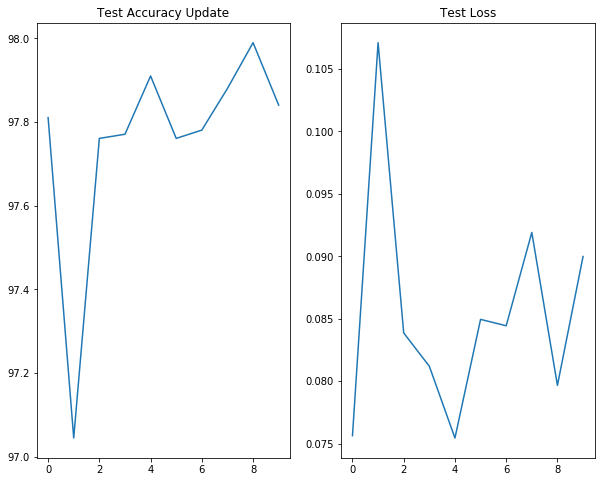

In [ ]:
def multiple_pass(p_network, p_optim):
  # Input: p_network, p_optim
  # Output: Output a chart accuracy 
  all_epochs_acc = []
  all_epochs_loss = []
  
  for epoch in range(10): # I have used 10, please increase it to 50 epochs to train
    # Fill out here
    # ...







  # Plotting the accuracy and loss graphs
  # ...







print("Running the network with SGD optimizer with learning rate = 0.1")
multiple_pass(network, optimizer)


Q7. Play around with the momentum of the SGD optimizer and then replace the SGD optimizer with Adam and RMSProp and analyze the loss trajectory (save the value of loss in an array after each update) of 50 training iterations for each of these types of optimizers. 


Base model defined
Now running the same network with Adam Optimizer
Iter: 0.00.  Train Total Loss: 2.31.  Train Accuracy: 14.06% 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Iter: 0.11.  Train Total Loss: 0.58.  Train Accuracy: 78.12% 
Iter: 0.21.  Train Total Loss: 0.24.  Train Accuracy: 90.62% 
Iter: 0.32.  Train Total Loss: 0.33.  Train Accuracy: 87.50% 
Iter: 0.43.  Train Total Loss: 0.44.  Train Accuracy: 87.50% 
Iter: 0.53.  Train Total Loss: 0.31.  Train Accuracy: 87.50% 
Iter: 0.64.  Train Total Loss: 0.27.  Train Accuracy: 92.19% 
Iter: 0.75.  Train Total Loss: 0.23.  Train Accuracy: 90.62% 
Iter: 0.85.  Train Total Loss: 0.25.  Train Accuracy: 90.62% 
Iter: 0.96.  Train Total Loss: 0.14.  Train Accuracy: 95.31% 
 Epoch: 0.  Training Total Loss: 0.36.  Training Accuracy: 88.80%  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


 Epoch: 0.  Test Total Loss: 0.23.  Test Accuracy: 92.98%  
Iter: 0.00.  Train Total Loss: 0.26.  Train Accuracy: 92.19% 
Iter: 0.11.  Train Total Loss: 0.17.  Train Accuracy: 92.19% 
Iter: 0.21.  Train Total Loss: 0.20.  Train Accuracy: 89.06% 
Iter: 0.32.  Train Total Loss: 0.29.  Train Accuracy: 89.06% 
Iter: 0.43.  Train Total Loss: 0.37.  Train Accuracy: 89.06% 
Iter: 0.53.  Train Total Loss: 0.11.  Train Accuracy: 96.88% 
Iter: 0.64.  Train Total Loss: 0.13.  Train Accuracy: 95.31% 
Iter: 0.75.  Train Total Loss: 0.23.  Train Accuracy: 96.88% 
Iter: 0.85.  Train Total Loss: 0.46.  Train Accuracy: 84.38% 
Iter: 0.96.  Train Total Loss: 0.34.  Train Accuracy: 89.06% 
 Epoch: 1.  Training Total Loss: 0.23.  Training Accuracy: 93.04%  
 Epoch: 1.  Test Total Loss: 0.19.  Test Accuracy: 94.53%  
Iter: 0.00.  Train Total Loss: 0.10.  Train Accuracy: 95.31% 
Iter: 0.11.  Train Total Loss: 0.58.  Train Accuracy: 81.25% 
Iter: 0.21.  Train Total Loss: 0.20.  Train Accuracy: 95.31% 
Iter: 

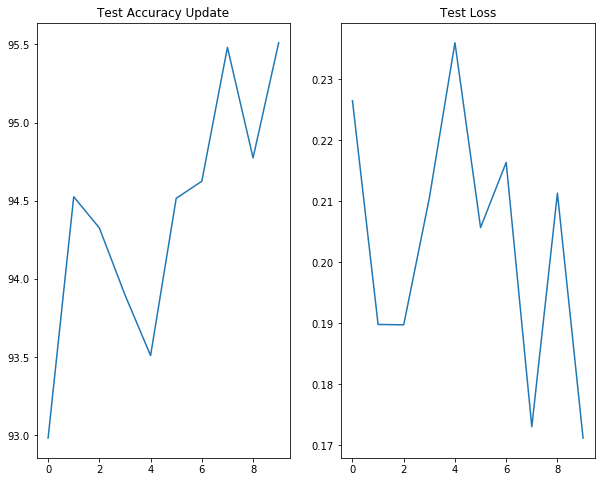

In [ ]:
# Declare a new model to train with Adam optimizer. Here I show Adam optimzier, try it with other optimizers as well








Q8. Play around with the initialization function like uniform and gaussian learnt in the lecture slides.


Base model defined
Linear(in_features=784, out_features=128, bias=True)
Parameter containing:
tensor([[-0.0089,  0.0131, -0.0676,  ...,  0.0476, -0.1256, -0.0151],
        [-0.0871,  0.0094,  0.0318,  ..., -0.0089,  0.0543,  0.0788],
        [-0.0464,  0.0333, -0.0021,  ...,  0.0360, -0.0193, -0.0468],
        ...,
        [ 0.0951, -0.0448,  0.1098,  ..., -0.0568, -0.0095, -0.0995],
        [-0.0506, -0.0195, -0.0073,  ...,  0.0838,  0.0383, -0.0127],
        [ 0.0451, -0.0079,  0.0246,  ..., -0.0320,  0.0199,  0.0726]],
       requires_grad=True)
Linear(in_features=128, out_features=64, bias=True)
Parameter containing:
tensor([[ 0.0171, -0.1715,  0.0793,  ...,  0.1808,  0.0473, -0.0487],
        [ 0.0315, -0.1056,  0.1555,  ...,  0.1407, -0.1301,  0.1960],
        [ 0.1086, -0.0534,  0.0449,  ...,  0.0753, -0.0454,  0.1165],
        ...,
        [-0.0661, -0.1695, -0.1412,  ...,  0.1218, -0.1086,  0.0313],
        [ 0.0352,  0.1493, -0.1309,  ..., -0.1047,  0.1893, -0.0473],
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Iter: 0.11.  Train Total Loss: 0.36.  Train Accuracy: 87.50% 
Iter: 0.21.  Train Total Loss: 0.60.  Train Accuracy: 78.12% 
Iter: 0.32.  Train Total Loss: 0.32.  Train Accuracy: 85.94% 
Iter: 0.43.  Train Total Loss: 0.26.  Train Accuracy: 90.62% 
Iter: 0.53.  Train Total Loss: 0.12.  Train Accuracy: 96.88% 
Iter: 0.64.  Train Total Loss: 0.27.  Train Accuracy: 89.06% 
Iter: 0.75.  Train Total Loss: 0.27.  Train Accuracy: 92.19% 
Iter: 0.85.  Train Total Loss: 0.48.  Train Accuracy: 82.81% 
Iter: 0.96.  Train Total Loss: 0.45.  Train Accuracy: 87.50% 
 Epoch: 0.  Training Total Loss: 0.40.  Training Accuracy: 87.97%  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


 Epoch: 0.  Test Total Loss: 0.25.  Test Accuracy: 92.29%  
Iter: 0.00.  Train Total Loss: 0.29.  Train Accuracy: 89.06% 
Iter: 0.11.  Train Total Loss: 0.13.  Train Accuracy: 95.31% 
Iter: 0.21.  Train Total Loss: 0.28.  Train Accuracy: 92.19% 
Iter: 0.32.  Train Total Loss: 0.28.  Train Accuracy: 92.19% 
Iter: 0.43.  Train Total Loss: 0.12.  Train Accuracy: 95.31% 
Iter: 0.53.  Train Total Loss: 0.39.  Train Accuracy: 89.06% 
Iter: 0.64.  Train Total Loss: 0.45.  Train Accuracy: 93.75% 
Iter: 0.75.  Train Total Loss: 0.17.  Train Accuracy: 93.75% 
Iter: 0.85.  Train Total Loss: 0.24.  Train Accuracy: 95.31% 
Iter: 0.96.  Train Total Loss: 0.06.  Train Accuracy: 98.44% 
 Epoch: 1.  Training Total Loss: 0.25.  Training Accuracy: 92.54%  
 Epoch: 1.  Test Total Loss: 0.24.  Test Accuracy: 92.75%  
Iter: 0.00.  Train Total Loss: 0.22.  Train Accuracy: 89.06% 
Iter: 0.11.  Train Total Loss: 0.11.  Train Accuracy: 95.31% 
Iter: 0.21.  Train Total Loss: 0.69.  Train Accuracy: 92.19% 
Iter: 

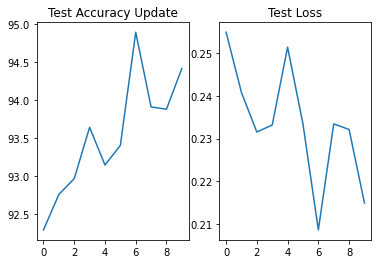

In [ ]:
def init_weights(m):
    # Fill out here
    # ...



    
    
network_initialized = Model().to(device)
network_initialized.apply(init_weights)

print("Now running the differently initialized model with Adam Optimizer")
multiple_pass(network_initialized, adam_optim)


Q9. Add batch normalization to each of the layers before ReLu activation function. Check how your results or iterations vary.

In [ ]:

class Model_Normalization(nn.Module):
    # Fill out here
    # ...
















print("Now running the differently initialized model with Adam Optimizer")
multiple_pass(network_batch_norm, adam_optim)

Base model defined
Model_Normalization(
  (linear_layer_one): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_layer_two): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear_layer_three): Linear(in_features=64, out_features=10, bias=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Now running the differently initialized model with Adam Optimizer
Iter: 0.00.  Train Total Loss: 2.76.  Train Accuracy: 10.94% 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Iter: 0.11.  Train Total Loss: 0.45.  Train Accuracy: 92.19% 
Iter: 0.21.  Train Total Loss: 0.22.  Train Accuracy: 90.62% 
Iter: 0.32.  Train Total Loss: 0.21.  Train Accuracy: 92.19% 
Iter: 0.43.  Train Total Loss: 0.28.  Train Accuracy: 90.62% 
Iter: 0.53.  Train Total Loss: 0.23.  Train Accuracy: 93.75% 
Iter: 0.64.  Train Total Loss: 0.19.  Train Accuracy: 95.31% 
Iter: 0.75.  Train Total Loss: 0.16.  Train Accuracy: 96.88% 
Iter: 0.85.  Train Total Loss: 0.17.  Train Accuracy: 93.75% 
Iter: 0.96.  Train Total Loss: 0.10.  Train Accuracy: 95.31% 
 Epoch: 0.  Training Total Loss: 0.25.  Training Accuracy: 93.34%  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()


 Epoch: 0.  Test Total Loss: 0.11.  Test Accuracy: 96.69%  
Iter: 0.00.  Train Total Loss: 0.07.  Train Accuracy: 98.44% 
Iter: 0.11.  Train Total Loss: 0.09.  Train Accuracy: 96.88% 
Iter: 0.21.  Train Total Loss: 0.09.  Train Accuracy: 98.44% 
Iter: 0.32.  Train Total Loss: 0.14.  Train Accuracy: 95.31% 
Iter: 0.43.  Train Total Loss: 0.08.  Train Accuracy: 96.88% 
Iter: 0.53.  Train Total Loss: 0.10.  Train Accuracy: 95.31% 
Iter: 0.64.  Train Total Loss: 0.25.  Train Accuracy: 92.19% 
Iter: 0.75.  Train Total Loss: 0.10.  Train Accuracy: 96.88% 
Iter: 0.85.  Train Total Loss: 0.06.  Train Accuracy: 98.44% 
Iter: 0.96.  Train Total Loss: 0.09.  Train Accuracy: 95.31% 
 Epoch: 1.  Training Total Loss: 0.12.  Training Accuracy: 96.53%  
 Epoch: 1.  Test Total Loss: 0.10.  Test Accuracy: 97.00%  
Iter: 0.00.  Train Total Loss: 0.06.  Train Accuracy: 98.44% 
Iter: 0.11.  Train Total Loss: 0.07.  Train Accuracy: 98.44% 
Iter: 0.21.  Train Total Loss: 0.07.  Train Accuracy: 96.88% 
Iter: 